<a href="https://colab.research.google.com/github/mateo020/CyclingCollisions-Data/blob/main/CyclingCollisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import csv
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
pd.set_option('display.max_rows',10)
pd.options.mode.chained_assignment = None
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Cyclist_KSI.csv',low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  1986 non-null   float64
 1   Y                  1986 non-null   float64
 2   OBJECTID           1986 non-null   int64  
 3   INDEX_             1986 non-null   int64  
 4   ACCNUM             1454 non-null   float64
 5   DATE               1986 non-null   object 
 6   TIME               1986 non-null   int64  
 7   STREET1            1986 non-null   object 
 8   STREET2            1790 non-null   object 
 9   OFFSET             377 non-null    object 
 10  ROAD_CLASS         1978 non-null   object 
 11  DISTRICT           1966 non-null   object 
 12  LATITUDE           1986 non-null   float64
 13  LONGITUDE          1986 non-null   float64
 14  ACCLOC             1492 non-null   object 
 15  TRAFFCTL           1980 non-null   object 
 16  VISIBILITY         1986 

The goal of this Data exploration Project is gain an undertanding of the causes of bycicle related accidents fatal, and nonfatal in the city of Toronto.

Some points of interest: Cause, location, roadType, avg_traffic, what time, type of vehicle.

# Location

In [7]:
df.head()

X             Y  OBJECTID   INDEX_    ACCNUM  \
0  634737.312050  4.845771e+06         1  3383485  891027.0   
1  634737.312050  4.845771e+06         2  3383486  891027.0   
2  645924.646785  4.847996e+06         3  3390109  893580.0   
3  645924.646785  4.847996e+06         4  3390110  893580.0   
4  645924.646785  4.847996e+06         5  3390111  893580.0   

                     DATE  TIME          STREET1         STREET2 OFFSET  ...  \
0  2006/02/11 05:00:00+00  1804     UNDERHILL DR  CASSANDRA BLVD    NaN  ...   
1  2006/02/11 05:00:00+00  1804     UNDERHILL DR  CASSANDRA BLVD    NaN  ...   
2  2006/02/27 05:00:00+00  1955  MORNINGSIDE AVE     KINGSTON RD    NaN  ...   
3  2006/02/27 05:00:00+00  1955  MORNINGSIDE AVE     KINGSTON RD    NaN  ...   
4  2006/02/27 05:00:00+00  1955  MORNINGSIDE AVE     KINGSTON RD    NaN  ...   

  SPEEDING AG_DRIV  REDLIGHT  ALCOHOL DISABILITY HOOD_158  \
0      NaN     NaN       NaN      NaN        NaN      149   
1      NaN     NaN       NaN      NaN        NaN      149   
2      NaN     Yes       NaN      NaN        NaN      136   
3      NaN     Yes       NaN      NaN        NaN      136   
4      NaN     Yes       NaN      NaN        NaN      136   

          NEIGHBOURHOOD_158 HOOD_140       NEIGHBOURHOOD_140 DIVISION  
0  Parkwoods-O'Connor Hills       45  Parkwoods-Donalda (45)      D33  
1  Parkwoods-O'Connor Hills       45  Parkwoods-Donalda (45)      D33  
2                 West Hill      136         West Hill (136)      D43  
3                 West Hill      136         West Hill (136)      D43  
4                 West Hill      136         West Hill (136)      D43  

[5 rows x 54 columns]

In [8]:
# prompt: split date column into multiple columns based on delimeter

df[['YEAR', 'MONTH', 'DATE_DAY']] = df['DATE'].str.split('/', expand=True)


In [17]:
df['YEAR'].unique()

array(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'], dtype=object)

In [9]:
n = 10
df['STREET1'].value_counts()[:n]


STREET1
DUNDAS ST W    83
BLOOR ST W     73
YONGE ST       44
COLLEGE ST     43
QUEEN ST W     39
KENNEDY RD     31
QUEEN ST E     30
DUFFERIN ST    28
DUNDAS ST E    26
KING ST W      26
Name: count, dtype: int64

In [10]:
n = 10
df['STREET2'].value_counts()[:n]

STREET2
DUFFERIN ST       29
BATHURST ST       21
YONGE ST          21
BLOOR ST W        21
KINGSTON RD       16
BAY ST            15
UNIVERSITY AVE    15
SPADINA AVE       15
YORK ST           12
FOXRIDGE DR       12
Name: count, dtype: int64

The most common streets where accidents accour, 'DUNDAS ST W' being the most common street for an accident.

Number of collisions:

In [11]:
n = 10
df['STREET2'].value_counts()[:n]

STREET2
DUFFERIN ST       29
BATHURST ST       21
YONGE ST          21
BLOOR ST W        21
KINGSTON RD       16
BAY ST            15
UNIVERSITY AVE    15
SPADINA AVE       15
YORK ST           12
FOXRIDGE DR       12
Name: count, dtype: int64

In [12]:
n = 10
df['STREET1'].value_counts()[:n]

STREET1
DUNDAS ST W    83
BLOOR ST W     73
YONGE ST       44
COLLEGE ST     43
QUEEN ST W     39
KENNEDY RD     31
QUEEN ST E     30
DUFFERIN ST    28
DUNDAS ST E    26
KING ST W      26
Name: count, dtype: int64

Overall accidents: Break down by road type

In [13]:


df['ROAD_CLASS'] = df['ROAD_CLASS'].fillna('Unknown')


In [14]:

df= df.fillna('na')

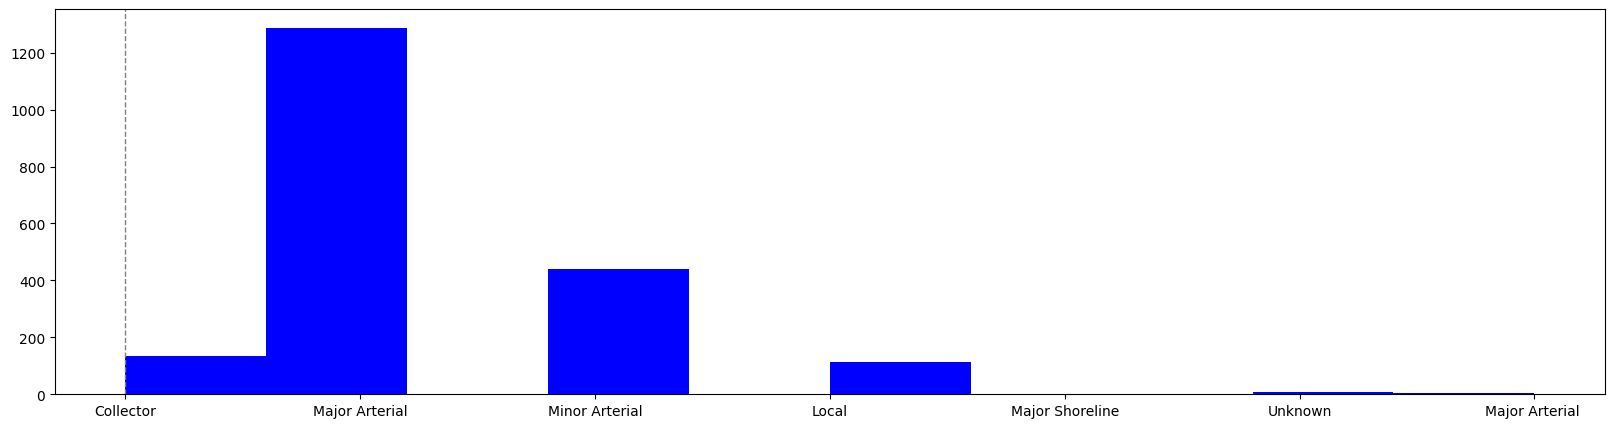

In [15]:
import matplotlib.pyplot as plt
bars = plt.hist(df['ROAD_CLASS'],bins = 10, color = 'blue')

plt.axvline(x =0, linestyle = '--', linewidth = 1, color = 'grey')

fig = plt.gcf()
fig.set_size_inches(20,5)

Look at the most common injuries on accidents in major arterial roads

In [16]:

df['INJURY'] = df['INJURY'].fillna('na')

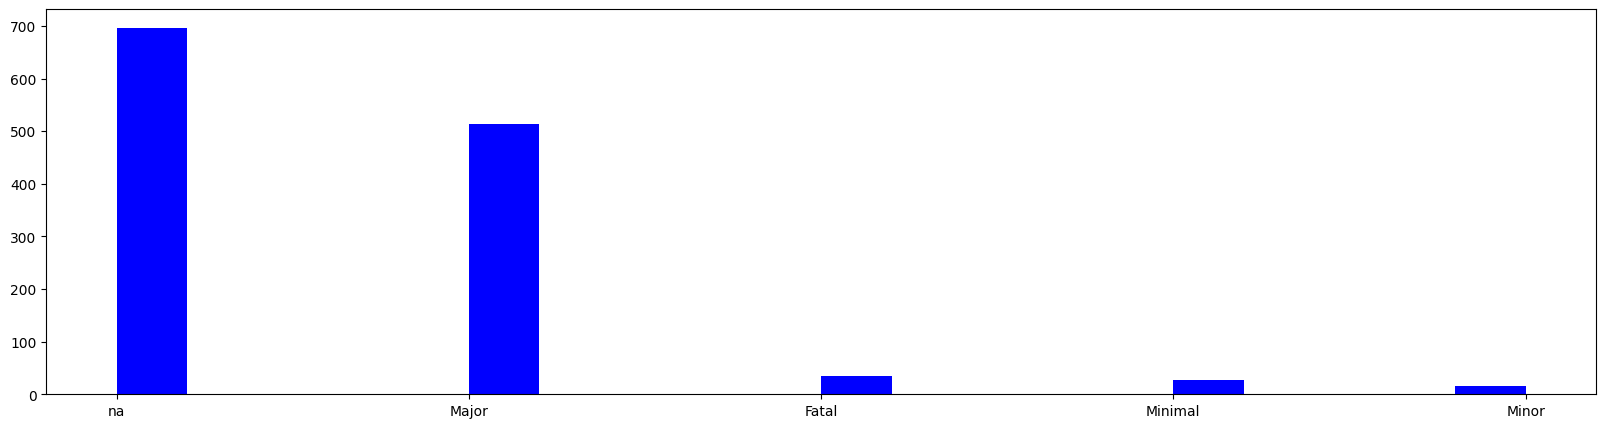

In [17]:

major = df[df['ROAD_CLASS'] == 'Major Arterial']
bars = plt.hist(major['INJURY'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)


Break down of injuries on Local roads

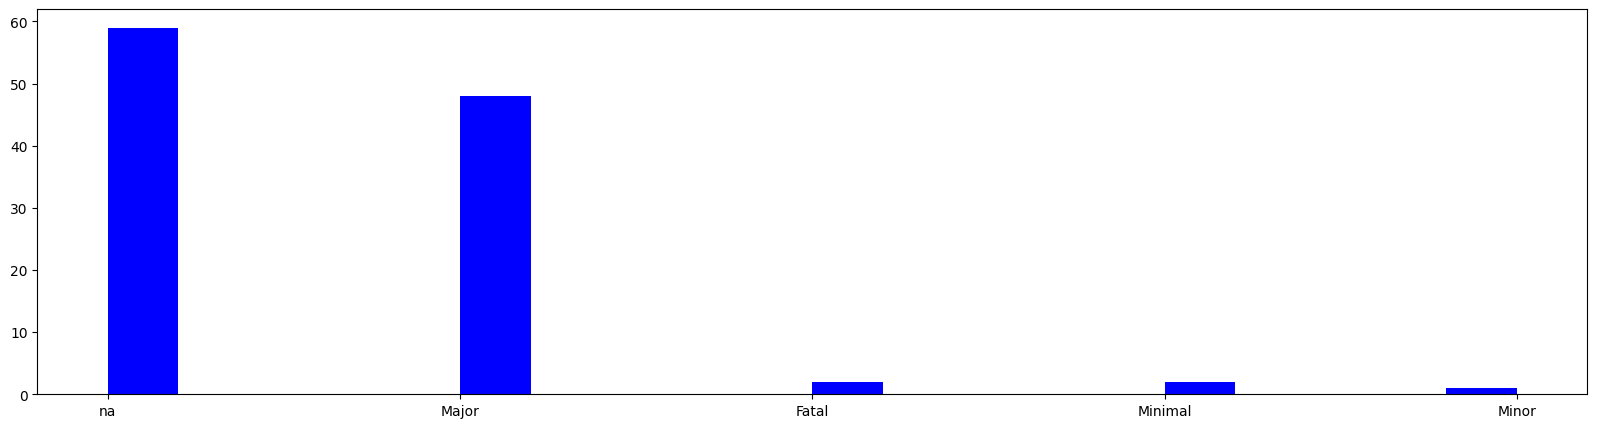

In [18]:
major = df[df['ROAD_CLASS'] == 'Local']
bars = plt.hist(major['INJURY'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

Break down of injuries on minor arterial roads

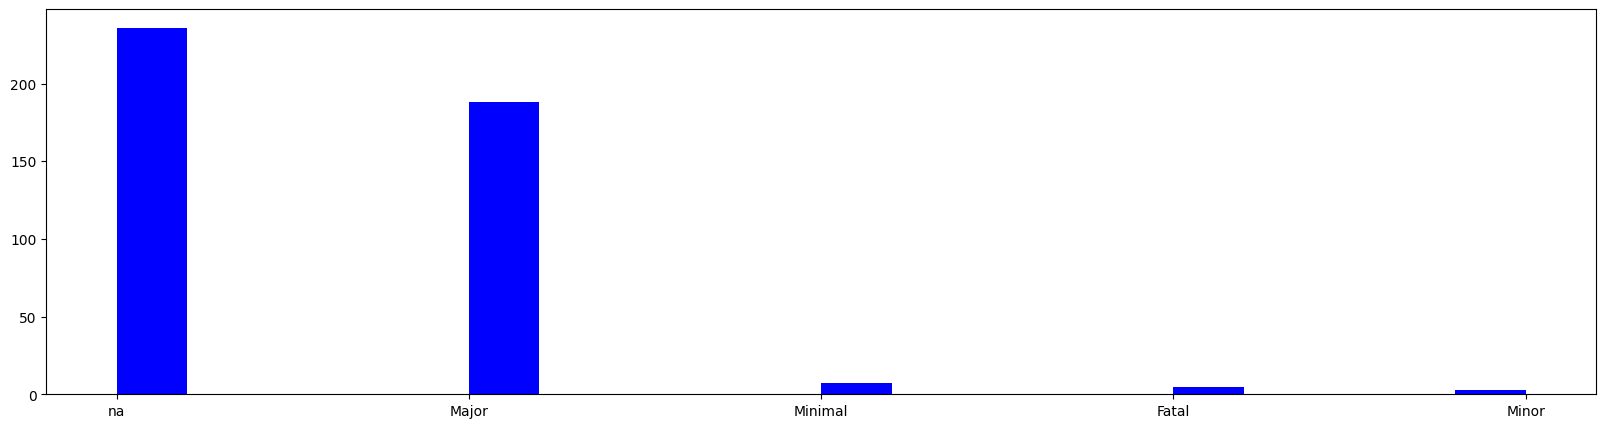

In [19]:
major = df[df['ROAD_CLASS'] == 'Minor Arterial']
bars = plt.hist(major['INJURY'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

Breakdown of injuries on Collector road:

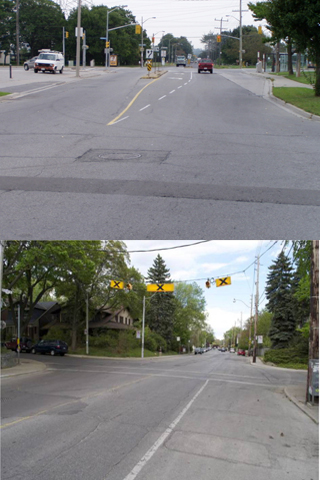

A collector road:
Provide access to property and traffic movement.
2,500 to 8,000 vehicles per day.

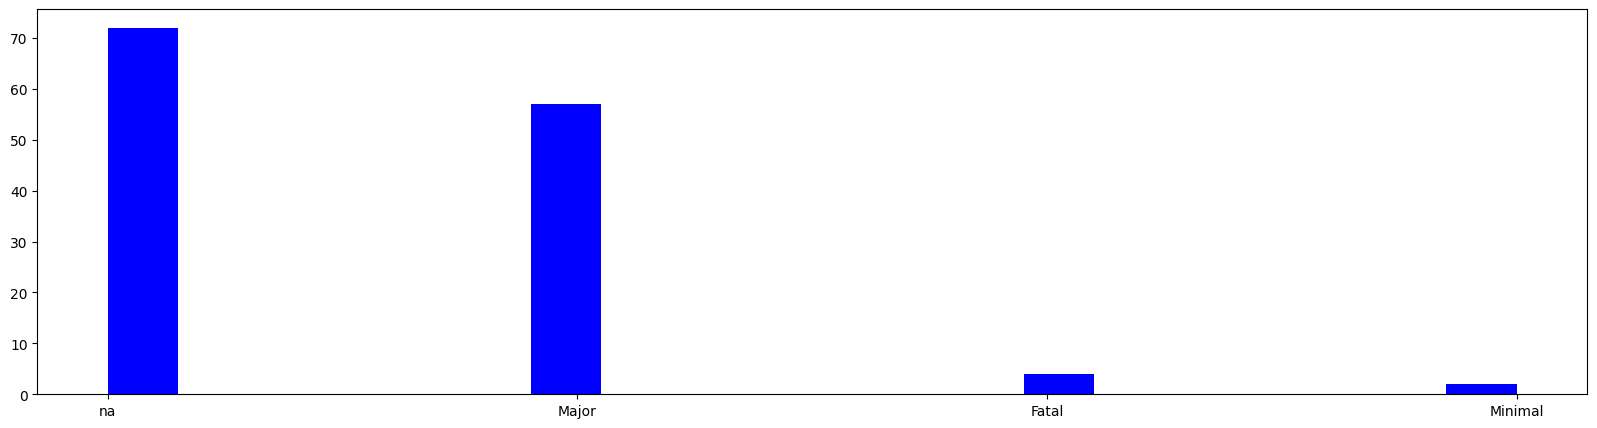

In [20]:
major = df[df['ROAD_CLASS'] == 'Collector']
bars = plt.hist(major['INJURY'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

On all types of roads most collision result in either no injuries of major injuries. Minor and Major arterial road acount for majority of incidents, including majority of fatal incidents. This could be attributed to the high volume of car traffic aswell as a primary path for a cyclist to get from point a to point b.

# Major, Minor Roads accident break down

In [21]:


df['YEAR'] = df['YEAR'].astype(int)


In [22]:
df1 = df[df['YEAR'] > 2016]


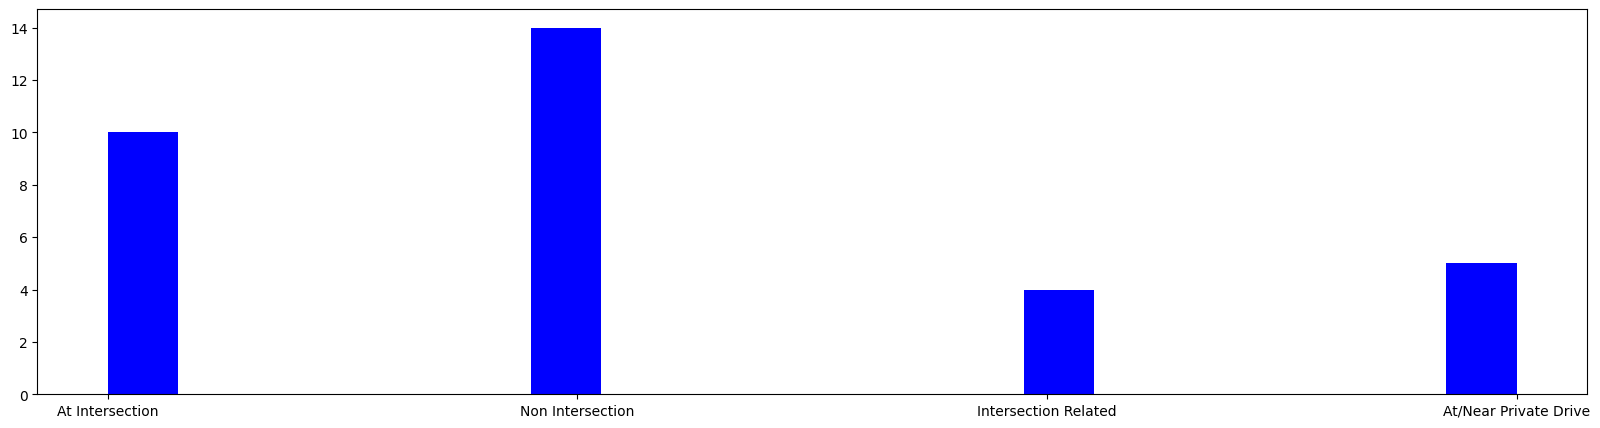

In [23]:
major = df1[df1['ROAD_CLASS'] == 'Collector']
bars = plt.hist(major['ACCLOC'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

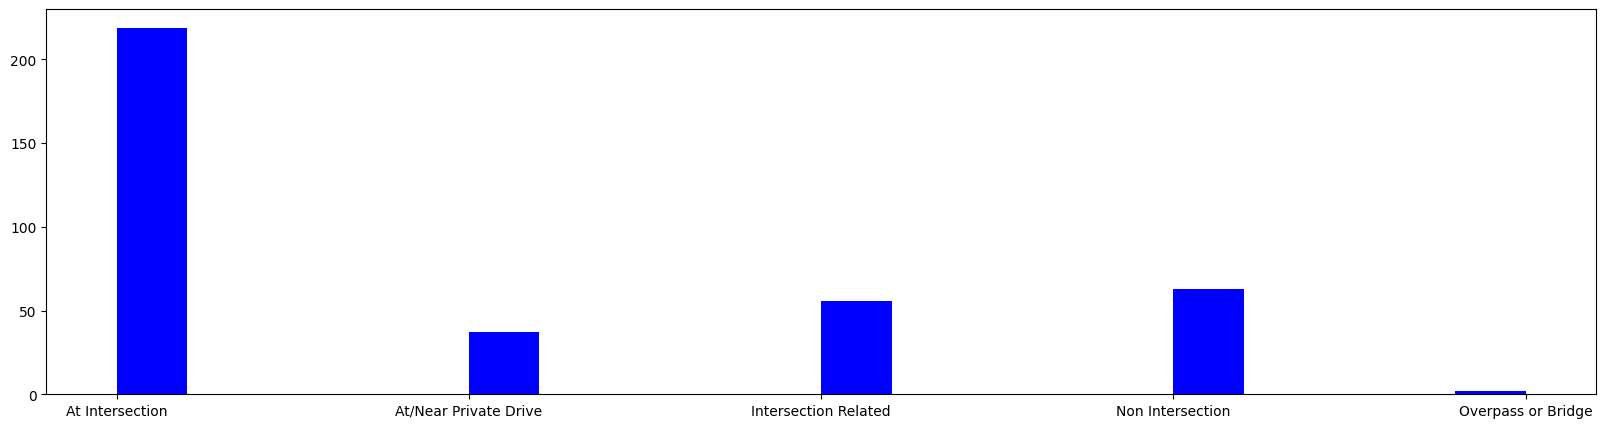

In [24]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
bars = plt.hist(major['ACCLOC'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

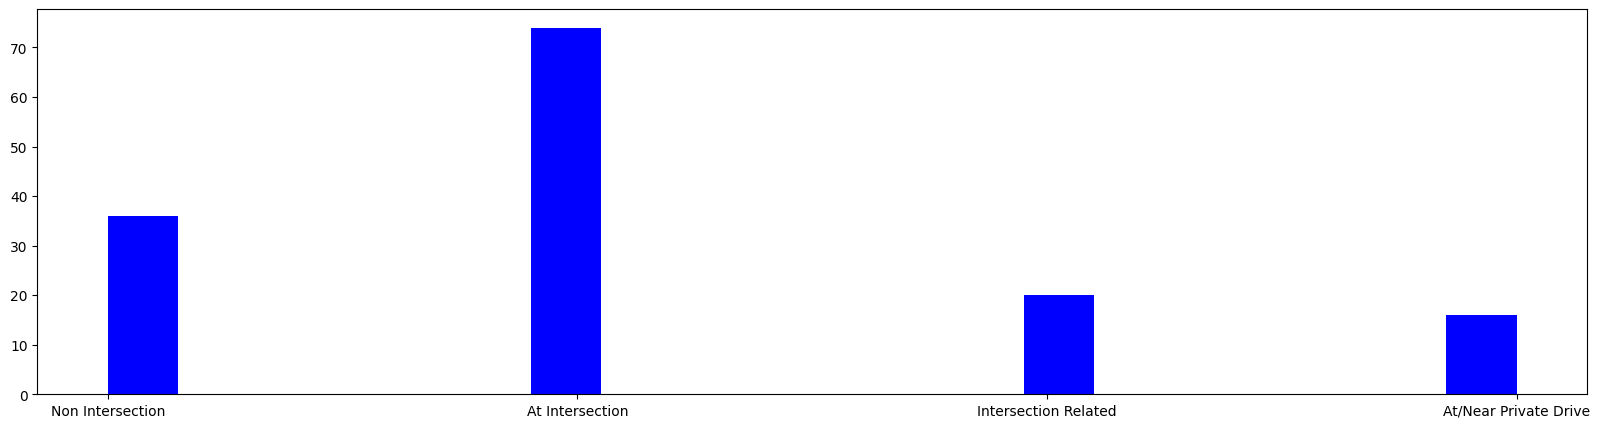

In [25]:
major = df1[df1['ROAD_CLASS'] == 'Minor Arterial']
bars = plt.hist(major['ACCLOC'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

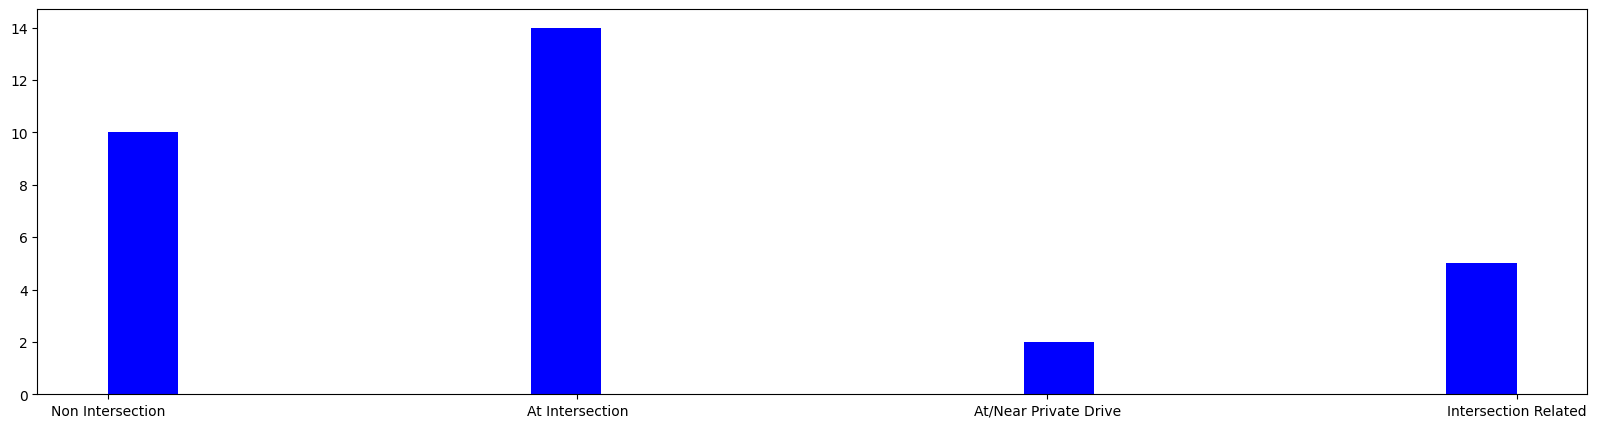

In [26]:
major = df1[df1['ROAD_CLASS'] == 'Local']
bars = plt.hist(major['ACCLOC'],bins = 20, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(20,5)

# Accidents at intersections

Focusing on major and minor arterial roads intersection driver manuver and cyclist acc, The goal is too determine possible manuvers that corrolate with cyling injuries.


Major Roads

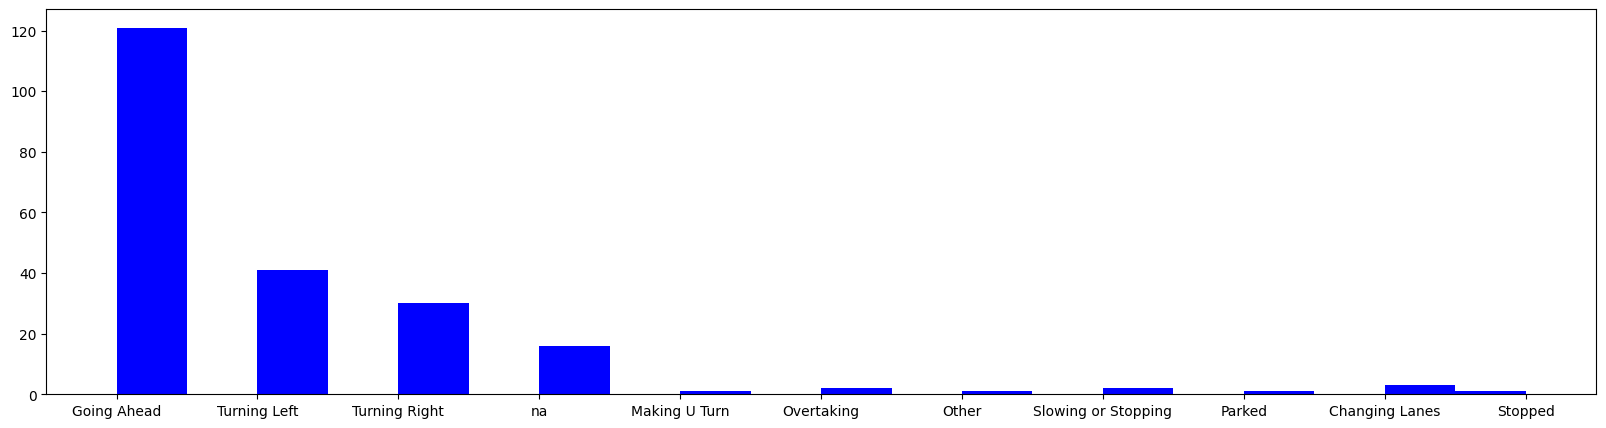

In [27]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
intersec = major[major['ACCLOC'] == 'At Intersection']
bars = plt.hist(intersec['MANOEUVER'],bins = 20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(20,5)

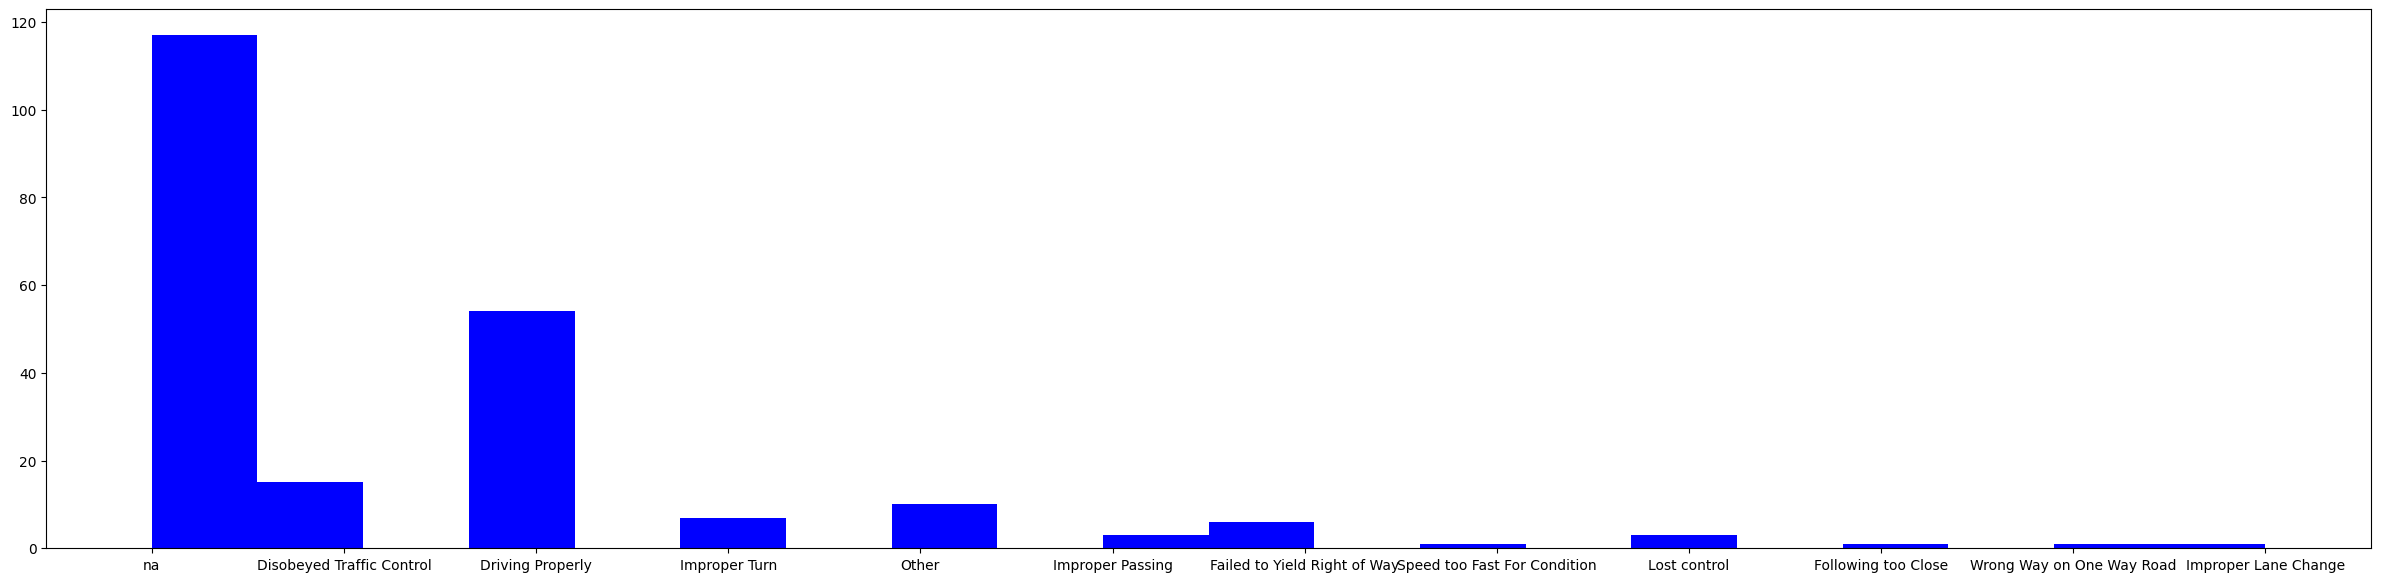

In [28]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
intersec = major[major['ACCLOC'] == 'At Intersection']
bars = plt.hist(intersec['CYCACT'],bins = 20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(30,7)

Minor arterial

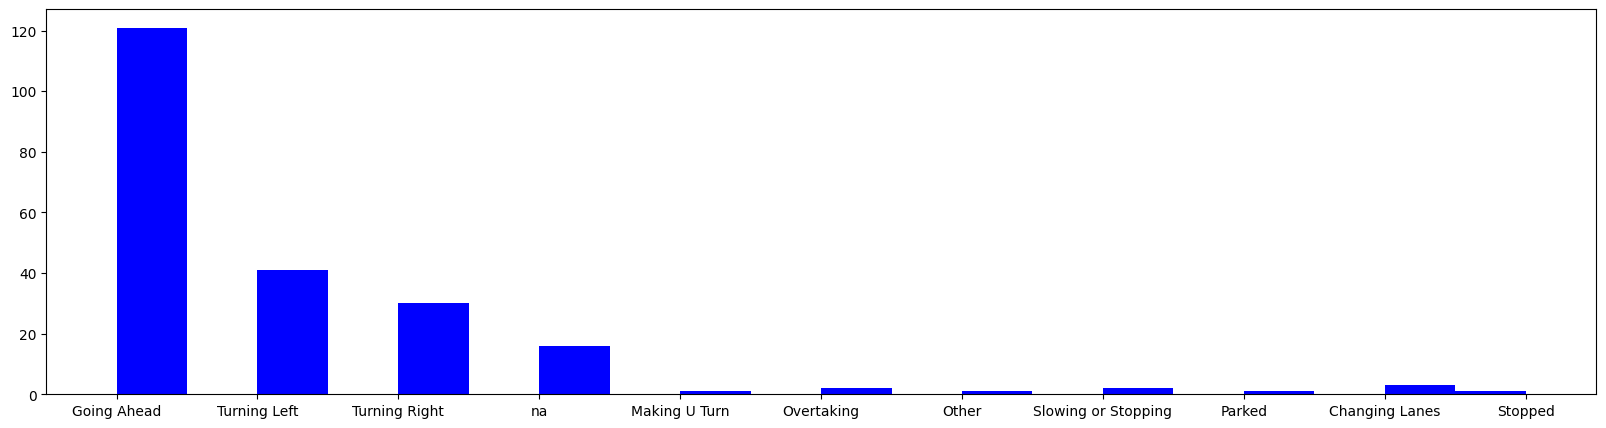

In [29]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
intersec = major[major['ACCLOC'] == 'At Intersection']
bars = plt.hist(intersec['MANOEUVER'],bins = 20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(20,5)

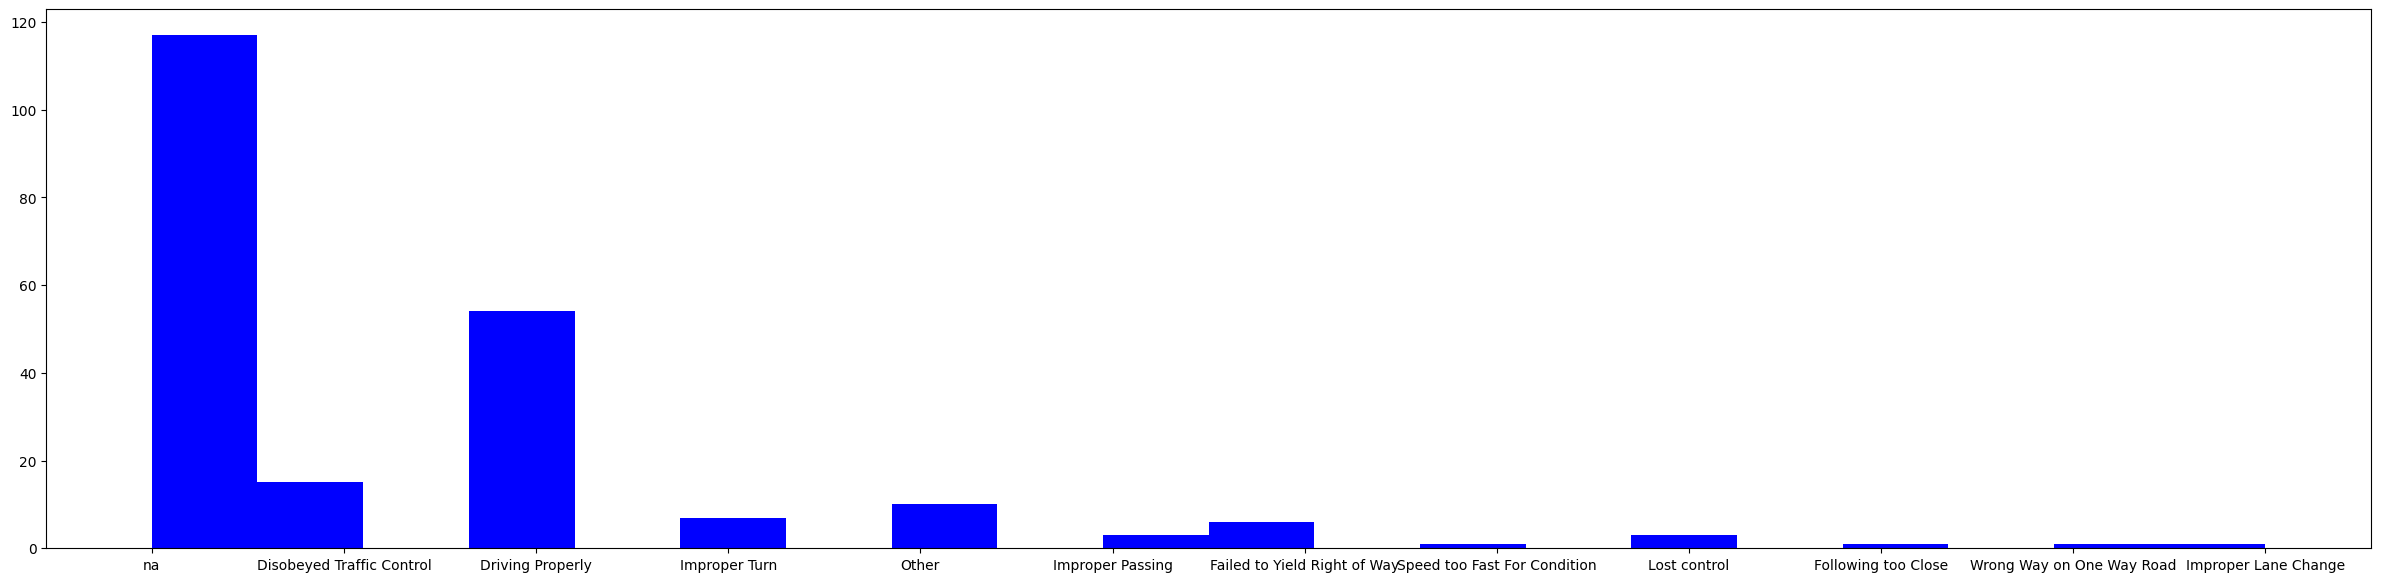

In [30]:
major = df1[df1['ROAD_CLASS'] == 'Major Arterial']
intersec = major[major['ACCLOC'] == 'At Intersection']
bars = plt.hist(intersec['CYCACT'],bins = 20, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(30,7)

# Neighbourhoods

Taking a look at what neighbourhoods
 have the most anount of reported accidents in order to see if potentially infracture in these areas could be inproved:

<Axes: ylabel='NEIGHBOURHOOD_158'>

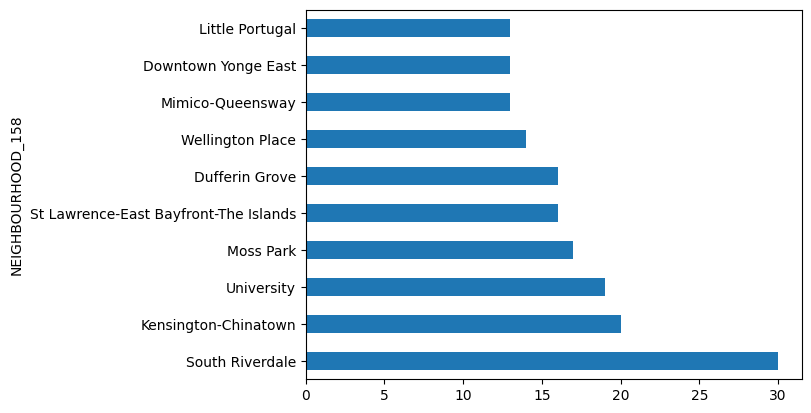

In [31]:

df1['NEIGHBOURHOOD_158'].value_counts()[:10].plot(kind = 'barh')

What questions does this information asnwer?
1. Where are these accidents occouring?
Most collisions occur at intersections in heavly transited roads (major and minor arterial). Majority of accidents clyclist-Vehicle collisions at intersection involving a vehicle going ahead. Vehicles performing turns at intersections make up the next biggest amount of accidents at iintersections.


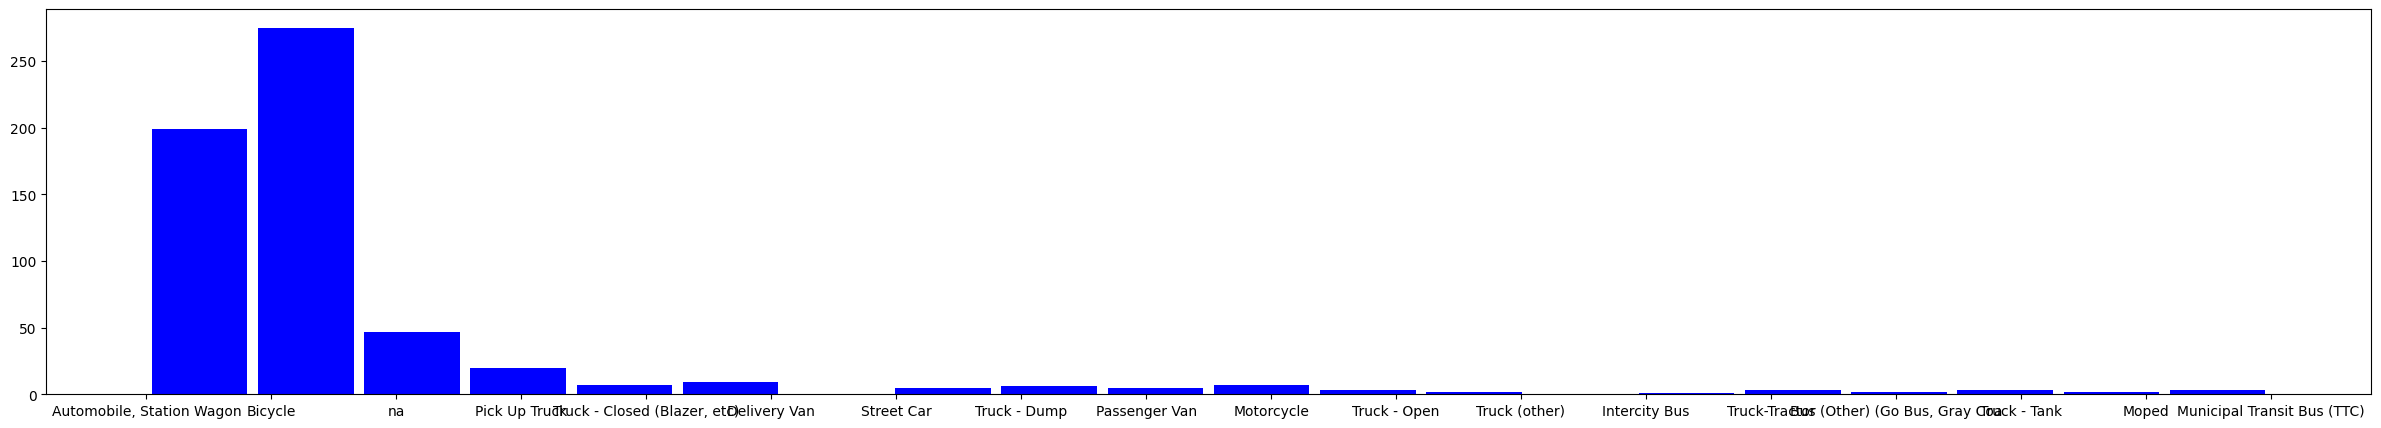

In [32]:
bars = plt.hist(df1['VEHTYPE'], bins=20, color='blue', rwidth=0.9)  # Adjust rwidth for spacing

fig = plt.gcf()
fig.set_size_inches(30, 5)
plt.show()



# Geomaping
2. Where should bike infractructure be focused to prevent potential collision?

2. Did already bike infracture proof useful?

In [33]:
network_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/network_data.csv',low_memory = False)
network_df.head()

_id  OBJECTID  SEGMENT_ID  INSTALLED  UPGRADED PRE_AMALGAMATION  \
0  22717         1         1.0       2001    2007.0              Yes   
1  22718         2         2.0       2001    2009.0              Yes   
2  22719         3         3.0       2001    2011.0              Yes   
3  22720         4         4.0       2001    2011.0              Yes   
4  22721         5         5.0       2001    2012.0              Yes   

                       STREET_NAME                 FROM_STREET  \
0                      Kilbarry Rd               Highbourne Rd   
1  Martin Goodman / Waterfront Trl           Lake Shore Blvd W   
2      Gatineau Hydro Corridor Trl                Givendale Rd   
3             G Ross Lord Park Trl                 Dufferin St   
4              Etobicoke Creek Trl  Etobicoke Creek Trl Branch   

                     TO_STREET                ROADCLASS  ... DIR_HIGHORDER  \
0                  Oriole Pkwy  Collector - Residential  ...             E   
1    Martin Goodman Trl Branch          Multi-Use Trail  ...             E   
2                   Kennedy Rd          Multi-Use Trail  ...             E   
3  G Ross Lord Park Trl Branch          Multi-Use Trail  ...             S   
4               Forty Third St          Multi-Use Trail  ...             S   

              INFRA_HIGHORDER SEPA_HIGHORDER SEPB_HIGHORDER   ORIG_HIGHORDER  \
0                   Bike Lane          Paint            NaN         Sharrows   
1             Multi-Use Trail            NaN            NaN  Multi-Use Trail   
2             Multi-Use Trail            NaN            NaN  Multi-Use Trail   
3             Multi-Use Trail            NaN            NaN  Multi-Use Trail   
4  Multi-Use Trail - Entrance            NaN            NaN  Multi-Use Trail   

  BYLAWED       LAST_EDIT_DATE UPGRADE_DESCRIPTION Shape__Length  \
0     Yes  2019-08-15T16:04:01                 NaN    128.045211   
1     NaN  2019-08-15T16:04:01                 NaN    128.686230   
2     NaN  2019-08-15T16:04:01                 NaN    379.789303   
3     NaN  2019-08-15T16:04:01                 NaN    552.499431   
4     NaN  2019-08-15T16:04:01                 NaN    152.152899   

                                            geometry  
0  {u'type': u'MultiLineString', u'coordinates': ...  
1  {u'type': u'MultiLineString', u'coordinates': ...  
2  {u'type': u'MultiLineString', u'coordinates': ...  
3  {u'type': u'MultiLineString', u'coordinates': ...  
4  {u'type': u'MultiLineString', u'coordinates': ...  

[5 rows x 28 columns]

In [34]:

import matplotlib.pyplot as plt


from shapely.geometry import Point, Polygon

In [69]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:21
🔁 Restarting kernel...


In [1]:
!conda install geopandas


Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    azure-core-cpp-1.10.3      |       h91d86a7_1         333 KB  conda-forge
    azure-storage-blobs-cpp-12.10.0|       h00ab1b0_0         505 KB  conda-forge
    azure-storage-common-cpp-12.5.0|       hb858b4b_2         128 KB  conda-forge
    blosc-1.21.5               |       hc2324a3_1          48 KB  conda-forge
    branca-0.7.2               |     pyhd8ed1ab_0          28 KB  conda-forge
    brotli-1.1.0               |       hd590300_1          19 KB 

In [2]:
import geopandas as gpd

In [3]:
trails = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/map/Bike network data.shp')

<Axes: >

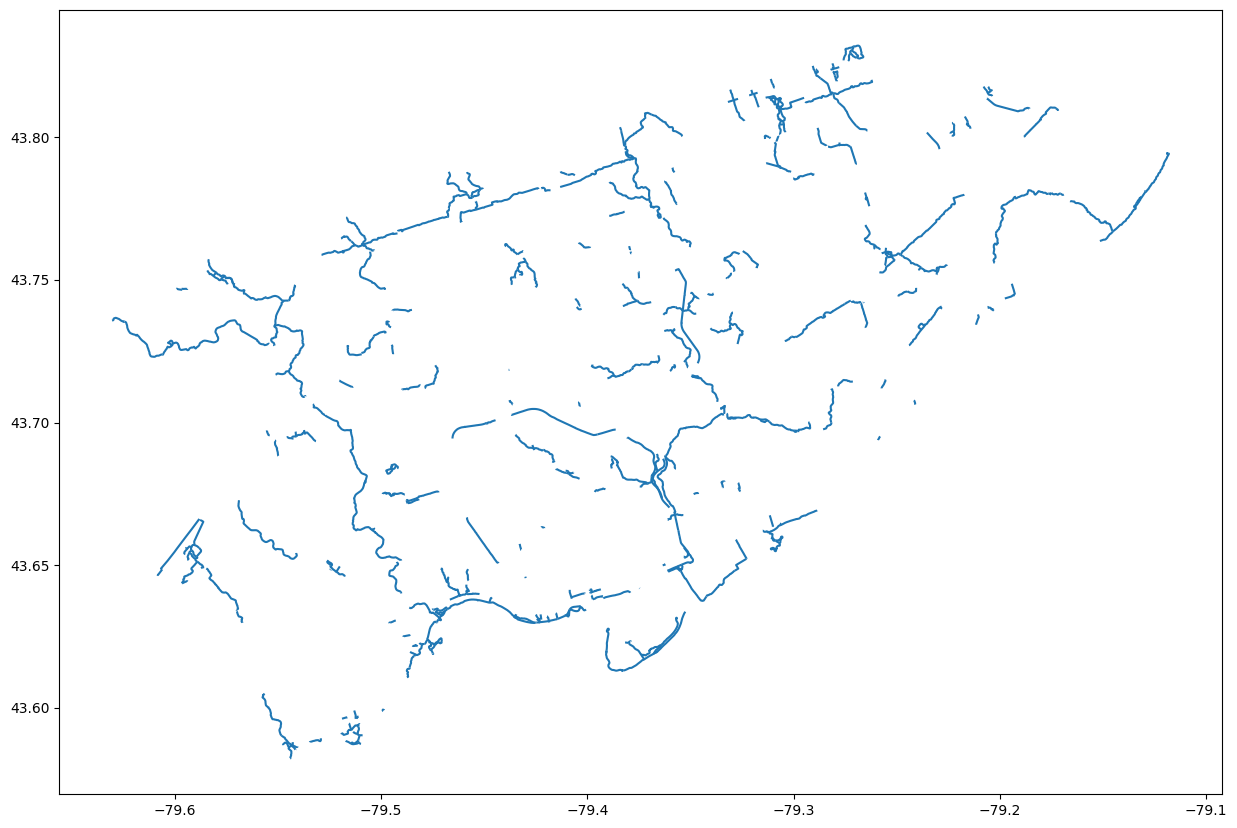

In [35]:
# trails['Multi-Use Trail']
fig,ax = plt.subplots(figsize = (15,15))
multi_trial = trails[(trails['FIELD_20'] == 'Multi-Use Trail')]
multi_trial.plot(ax = ax)

<Axes: >

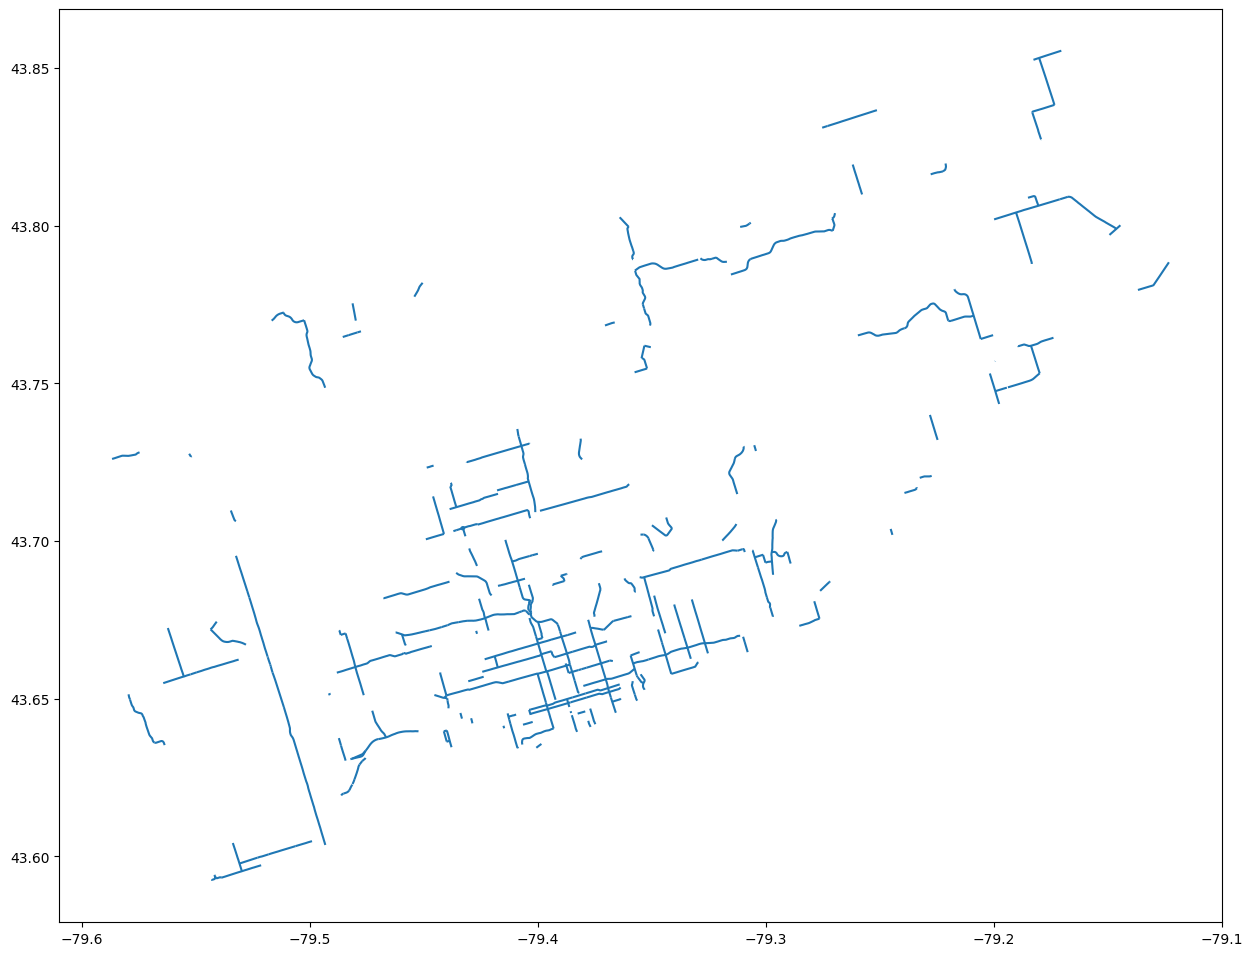

In [36]:
fig,ax = plt.subplots(figsize = (15,15))
streets = trails[(trails['FIELD_11'] == 'Fast Busy Street')]
streets.plot(ax = ax)


<Axes: >

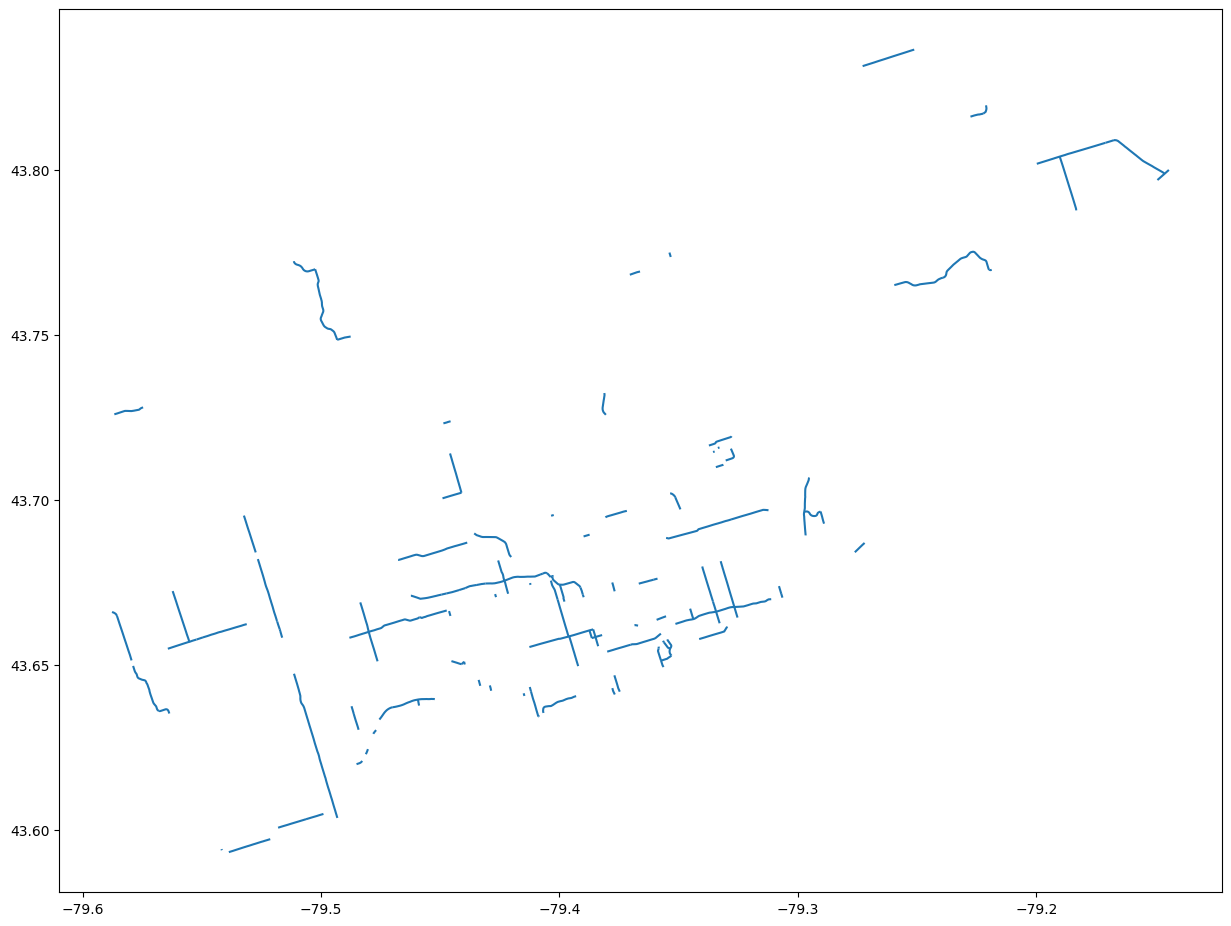

In [37]:
fig,ax = plt.subplots(figsize = (15,15))
bike_lane = trails[(trails['FIELD_20'] == 'Bike Lane')]
bike_lane.plot(ax = ax)

<Axes: >

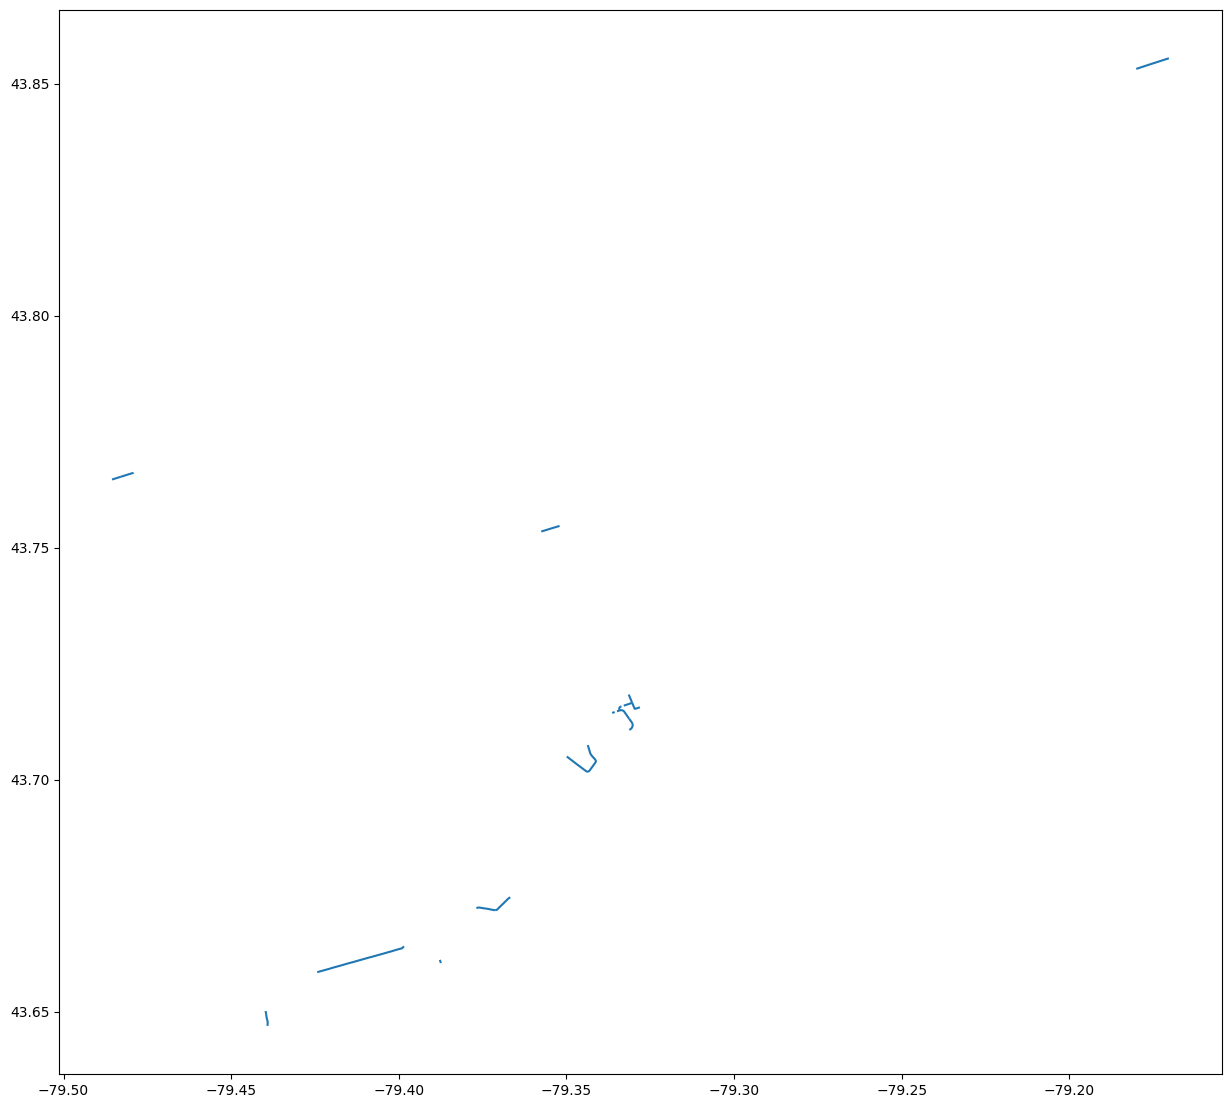

In [38]:
fig,ax = plt.subplots(figsize = (15,15))
bike_lane_buf = trails[(trails['FIELD_20'] == 'Bike Lane - Buffered')]
bike_lane_buf.plot(ax = ax)

<Axes: >

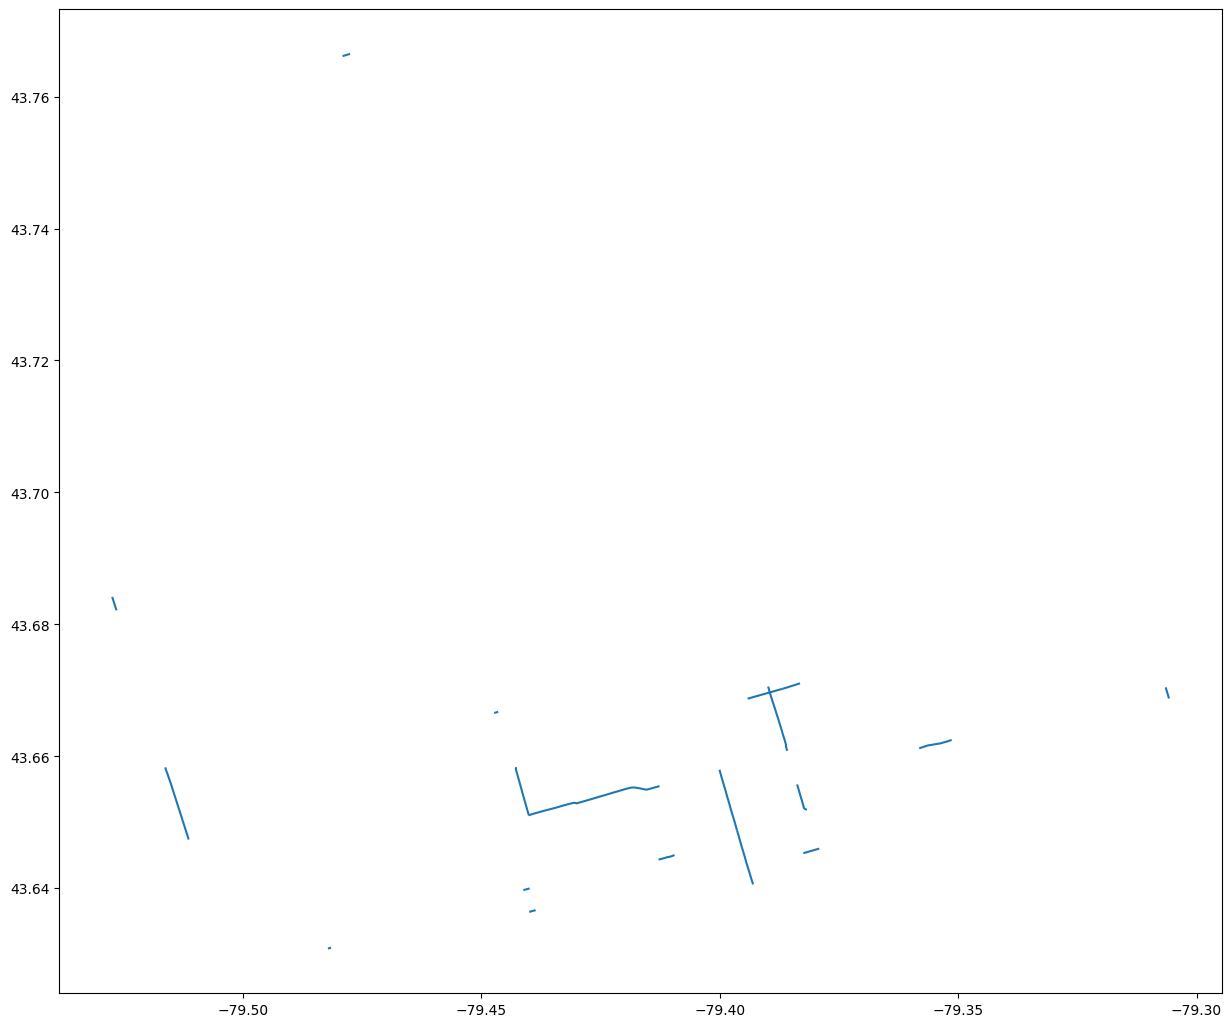

In [39]:
fig,ax = plt.subplots(figsize = (15,15))
Sharrows_arterial = trails[(trails['FIELD_20'] == 'Sharrows - Arterial')]
Sharrows_arterial.plot(ax = ax)

<Axes: >

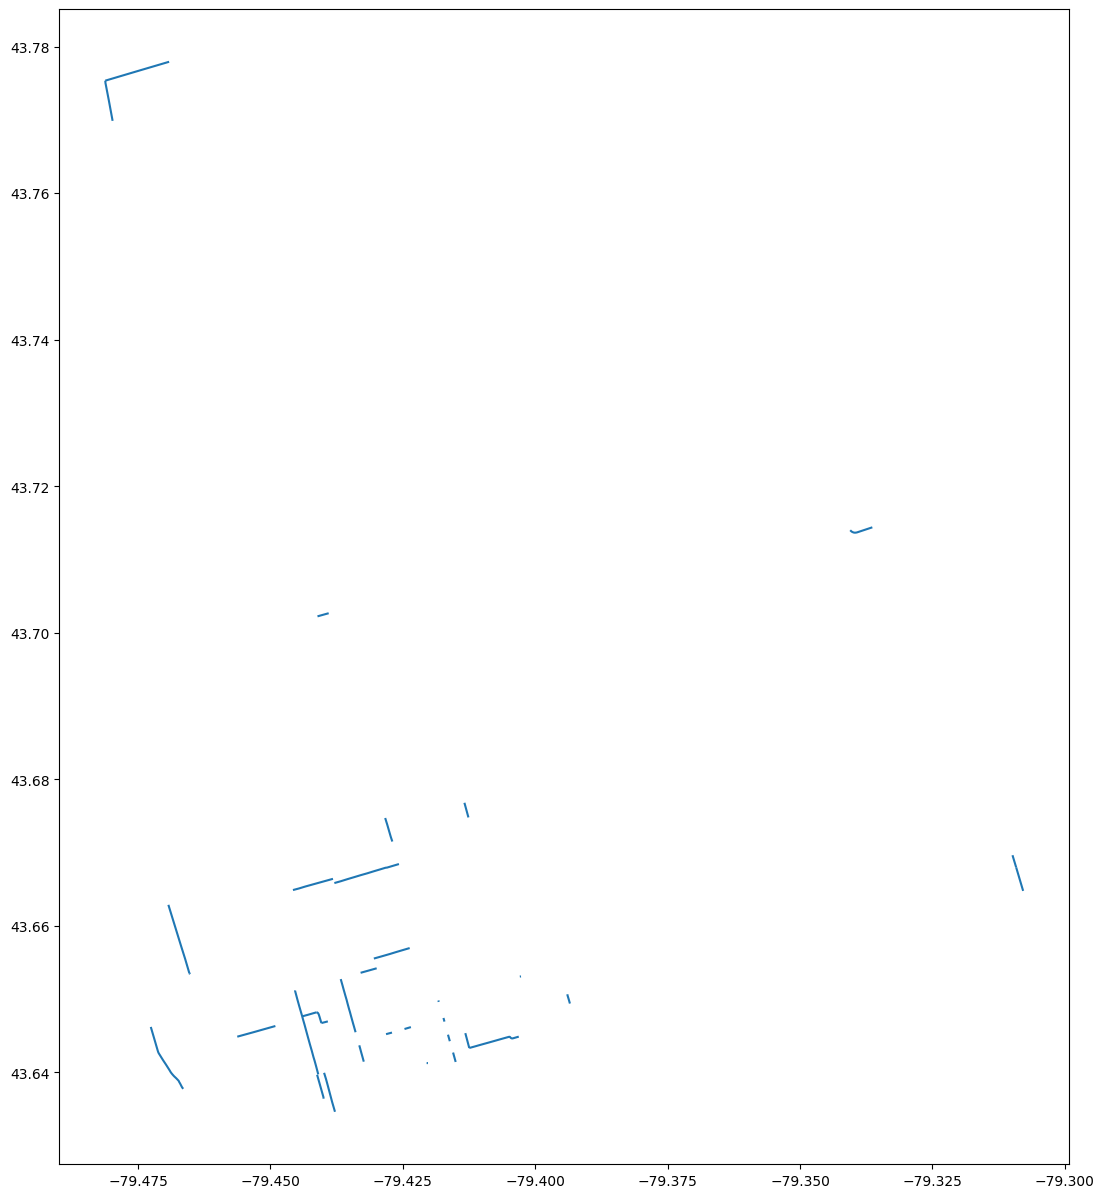

In [40]:
fig,ax = plt.subplots(figsize = (15,15))
Sharrows = trails[(trails['FIELD_20'] == 'Sharrows')]
Sharrows.plot(ax = ax)

<Axes: >

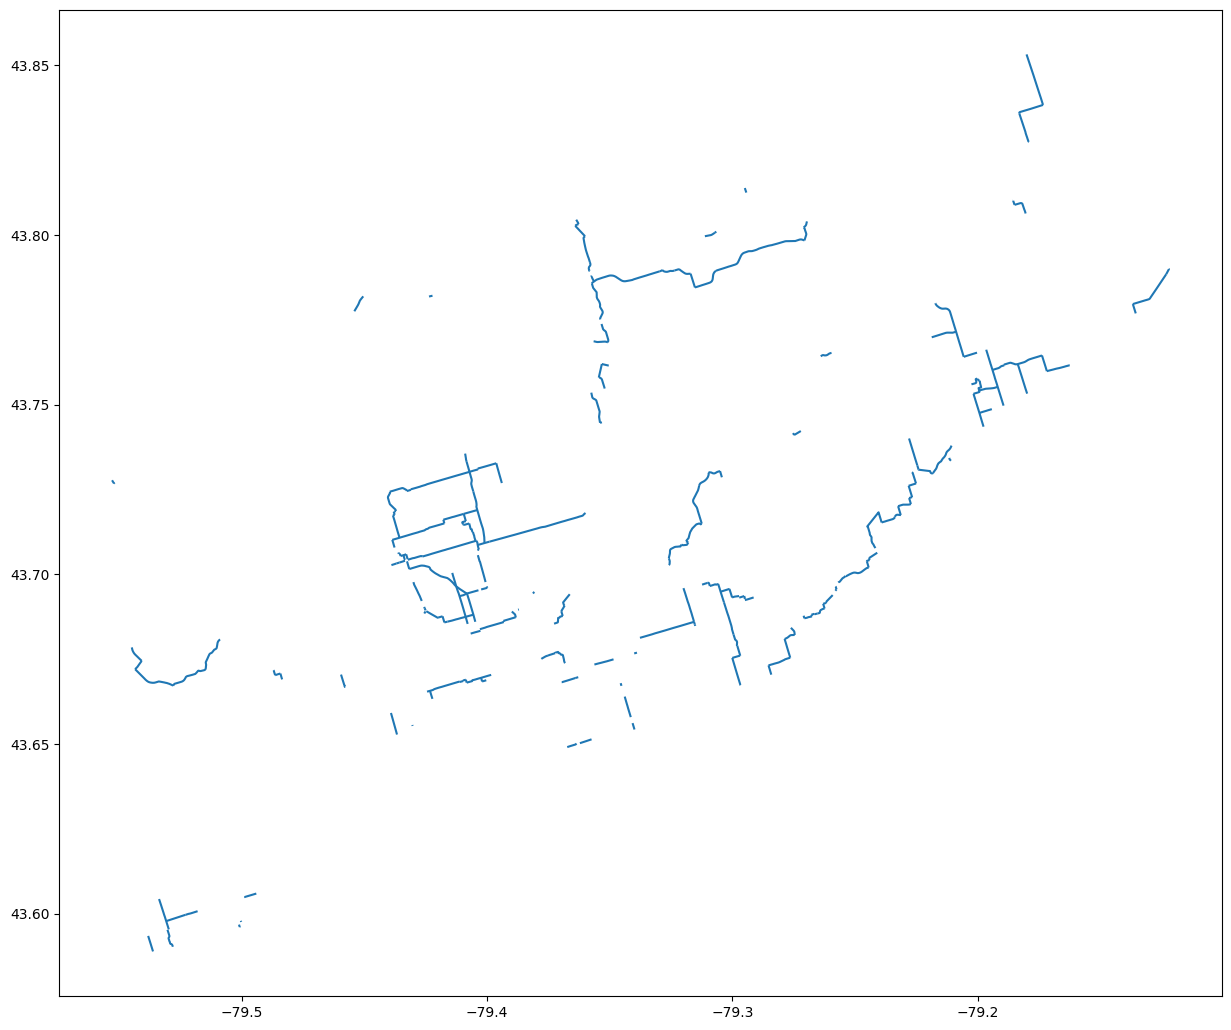

In [52]:
fig,ax = plt.subplots(figsize = (15,15))
route = trails[(trails['FIELD_20'] == 'Signed Route (No Pavement Markings)')]
route.plot(ax = ax)

<Axes: >

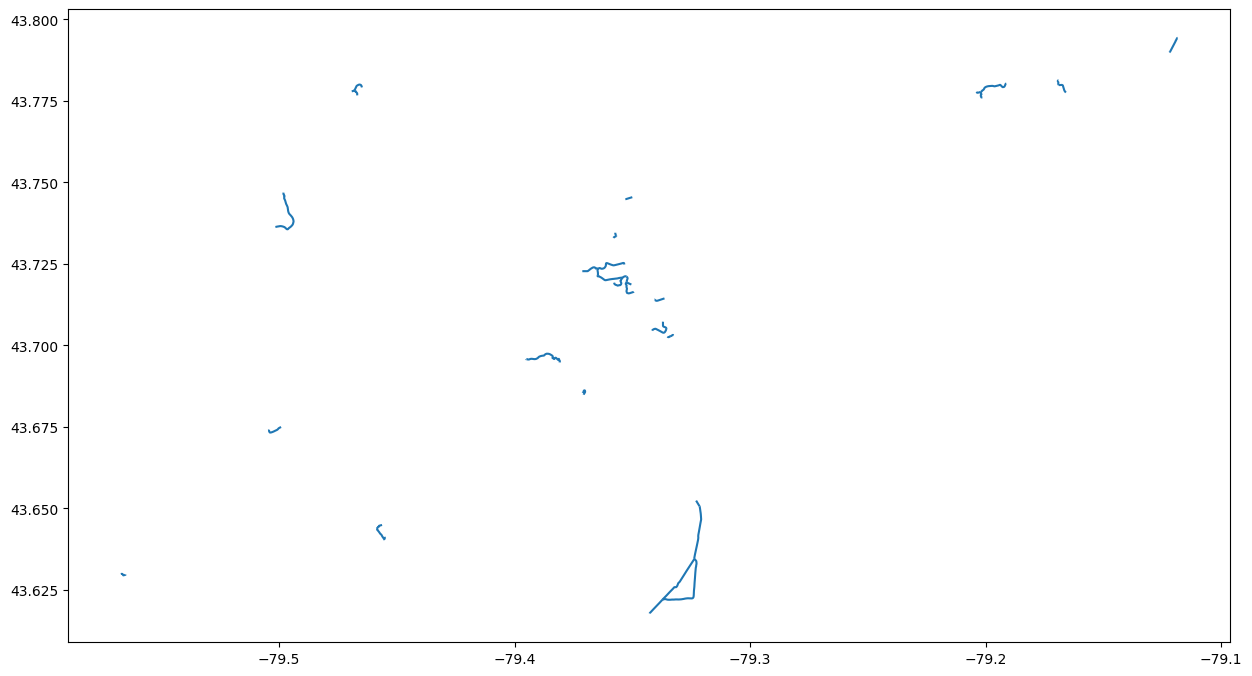

In [41]:
fig,ax = plt.subplots(figsize = (15,15))
park_road = trails[(trails['FIELD_20'] == 'Park Road')]
park_road.plot(ax = ax)

<Axes: >

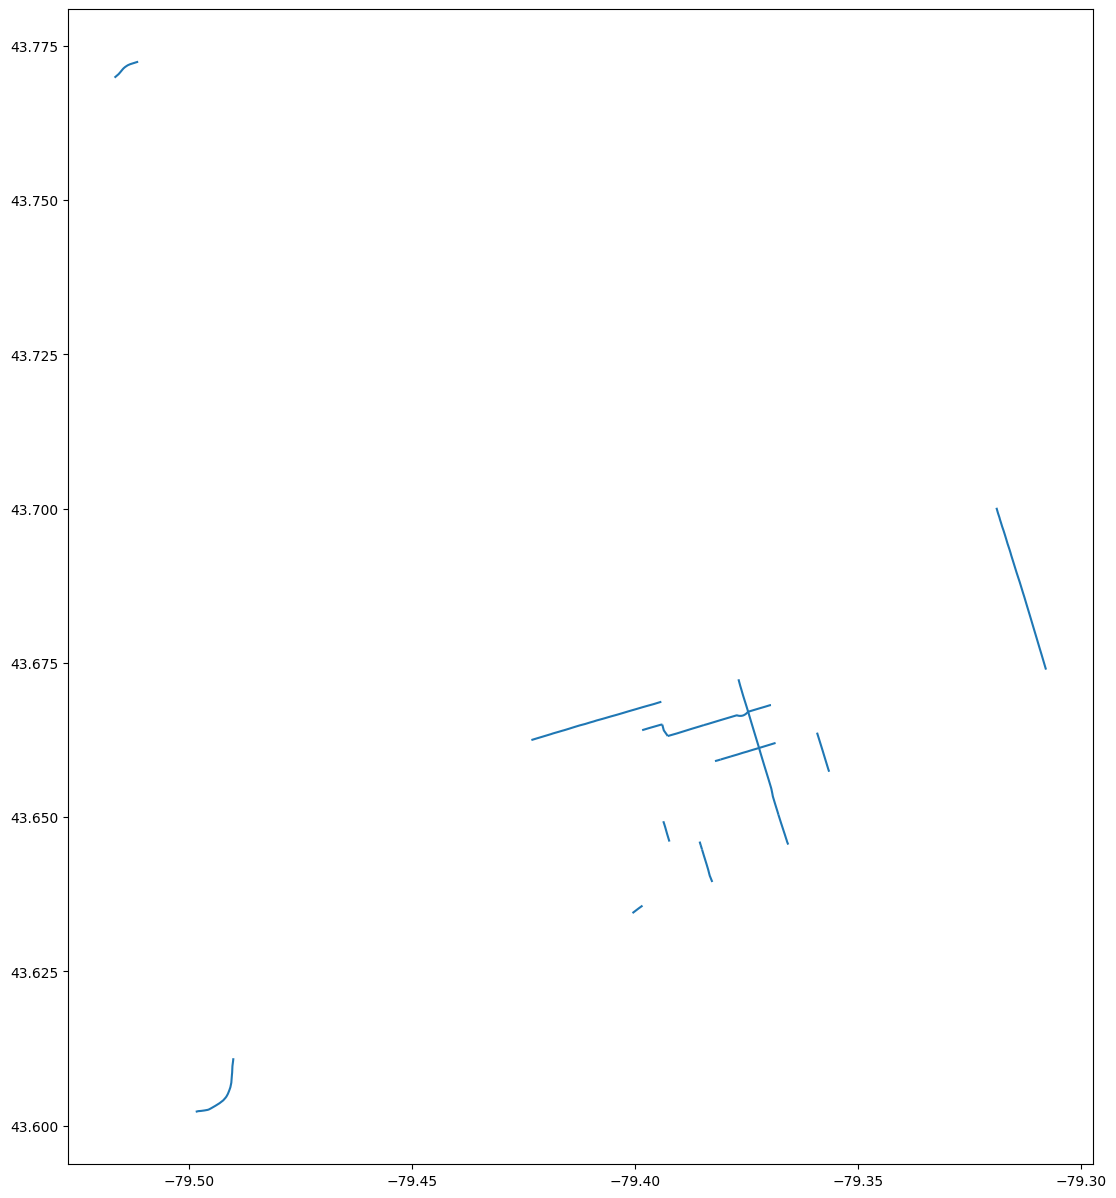

In [42]:
fig,ax = plt.subplots(figsize = (15,15))
Cycle_Track = trails[(trails['FIELD_20'] == 'Cycle Track')]
Cycle_Track.plot(ax = ax)

<Axes: >

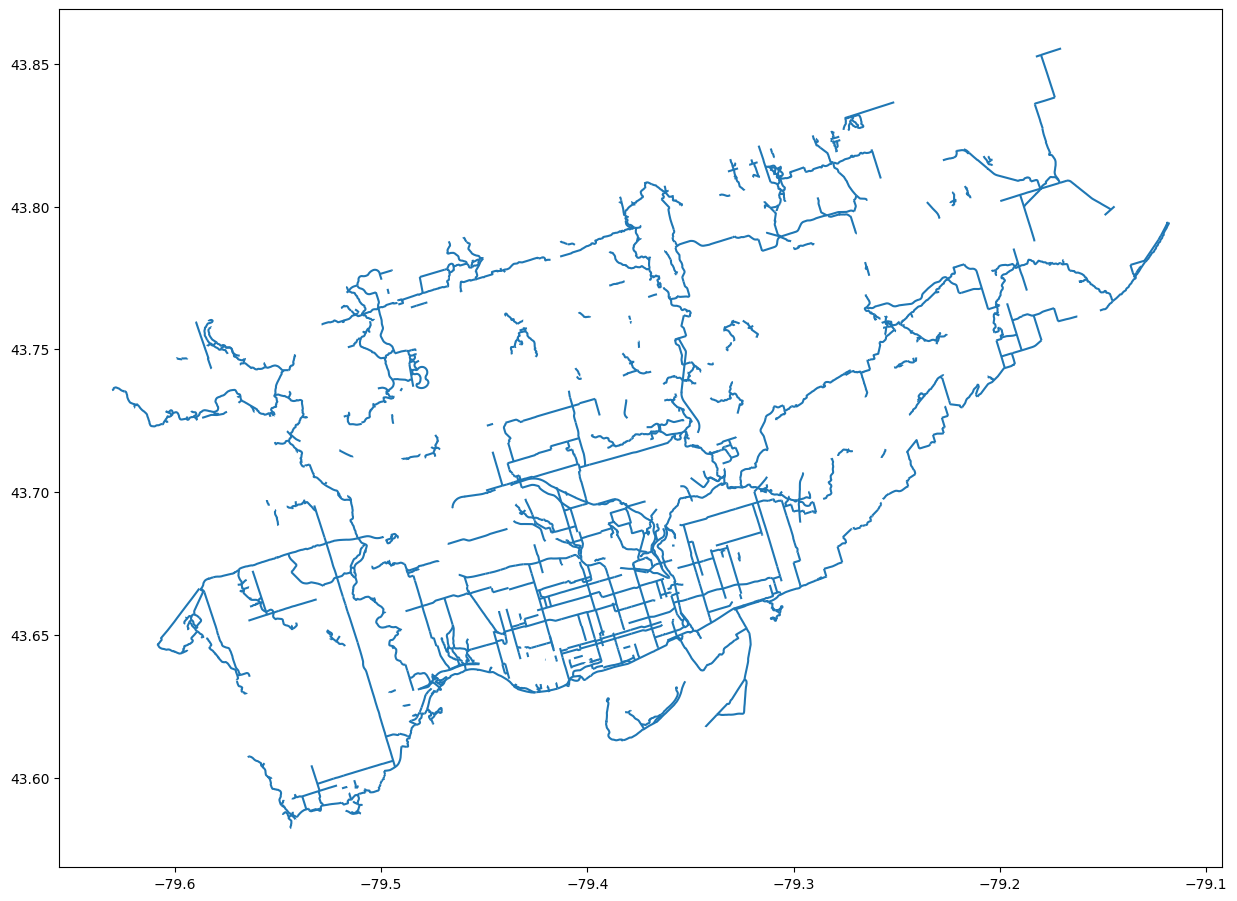

In [43]:
fig,ax = plt.subplots(figsize = (15,15))
trails.plot(ax = ax)

In [44]:
geometry = [Point(xy) for xy in zip(df1['LONGITUDE'],df1['LATITUDE'])]


In [45]:
crs = {'init':'EPSG:4326'}
geo_df = gpd.GeoDataFrame(df1, crs = crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


X             Y  OBJECTID    INDEX_ ACCNUM  \
1387  630827.752832  4.833860e+06      1388  80733456     na   
1388  630827.752832  4.833860e+06      1389  80733457     na   
1389  630827.752832  4.833860e+06      1390  80733512     na   
1390  629130.224443  4.835257e+06      1391  80772592     na   
1391  629130.224443  4.835257e+06      1392  80772593     na   

                        DATE  TIME       STREET1   STREET2        OFFSET  ...  \
1387  2017/01/27 05:00:00+00  1450    FRONT ST W  YONGE ST  100 m West o  ...   
1388  2017/01/27 05:00:00+00  1450    FRONT ST W  YONGE ST  100 m West o  ...   
1389  2017/01/27 05:00:00+00  1450    FRONT ST W  YONGE ST  100 m West o  ...   
1390  2017/02/26 05:00:00+00  2311  215 HURON ST        na  20 m South o  ...   
1391  2017/02/26 05:00:00+00  2311  215 HURON ST        na  20 m South o  ...   

     DISABILITY HOOD_158                      NEIGHBOURHOOD_158  HOOD_140  \
1387         na      166  St Lawrence-East Bayfront-The Islands        77   
1388         na      166  St Lawrence-East Bayfront-The Islands        77   
1389         na      166  St Lawrence-East Bayfront-The Islands        77   
1390         na       79                             University        79   
1391         na       79                             University        79   

                           NEIGHBOURHOOD_140 DIVISION  YEAR MONTH  \
1387  Waterfront Communities-The Island (77)      D52  2017    01   
1388  Waterfront Communities-The Island (77)      D52  2017    01   
1389  Waterfront Communities-The Island (77)      D52  2017    01   
1390                         University (79)      D52  2017    02   
1391                         University (79)      D52  2017    02   

            DATE_DAY                    geometry  
1387  27 05:00:00+00  POINT (-79.37783 43.64624)  
1388  27 05:00:00+00  POINT (-79.37783 43.64624)  
1389  27 05:00:00+00  POINT (-79.37783 43.64624)  
1390  26 05:00:00+00  POINT (-79.39853 43.65911)  
1391  26 05:00:00+00  POINT (-79.39853 43.65911)  

[5 rows x 58 columns]

<Axes: >

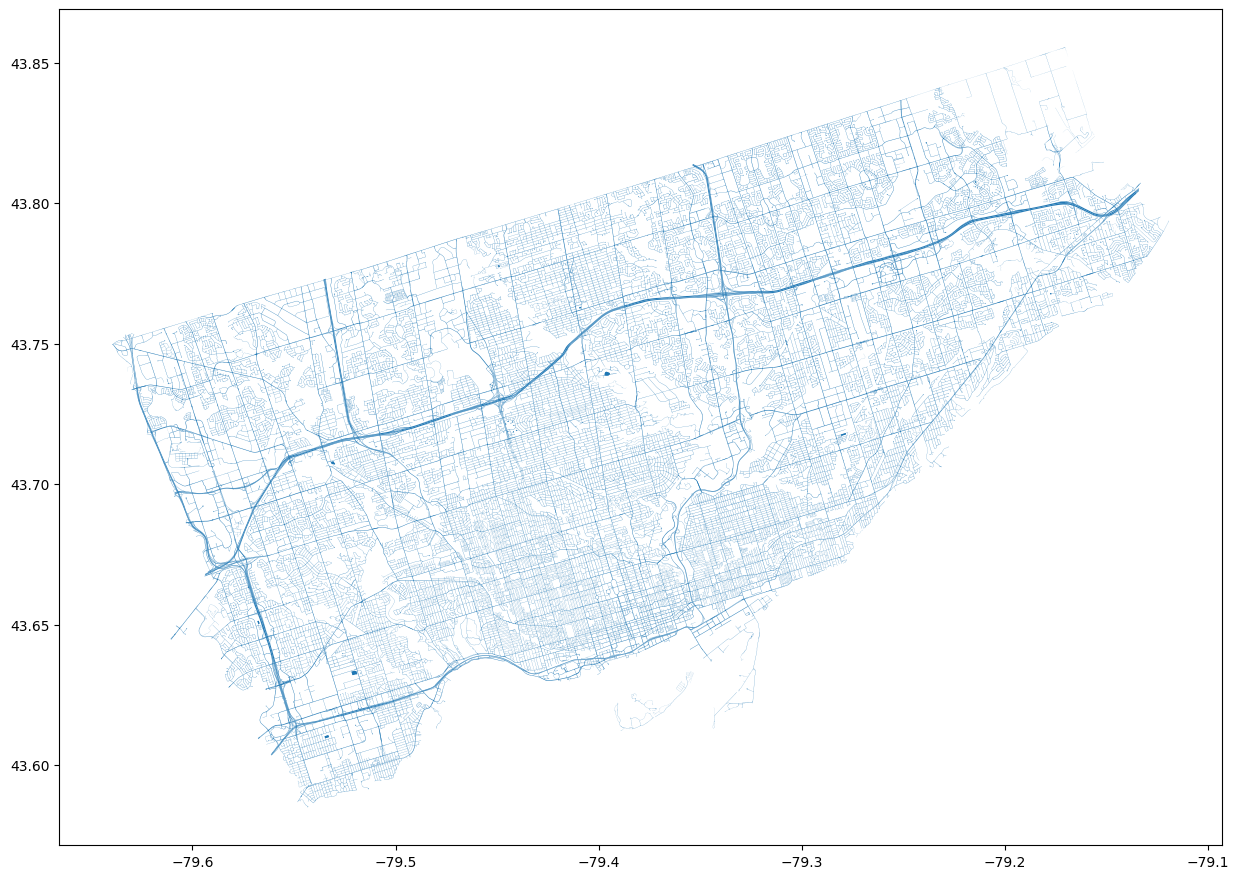

In [49]:
street = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/map/street/TOPO_EDGE_OF_ROAD_WGS84.shp')
fig,ax1 = plt.subplots(figsize = (15,15))
street.plot(ax= ax1)

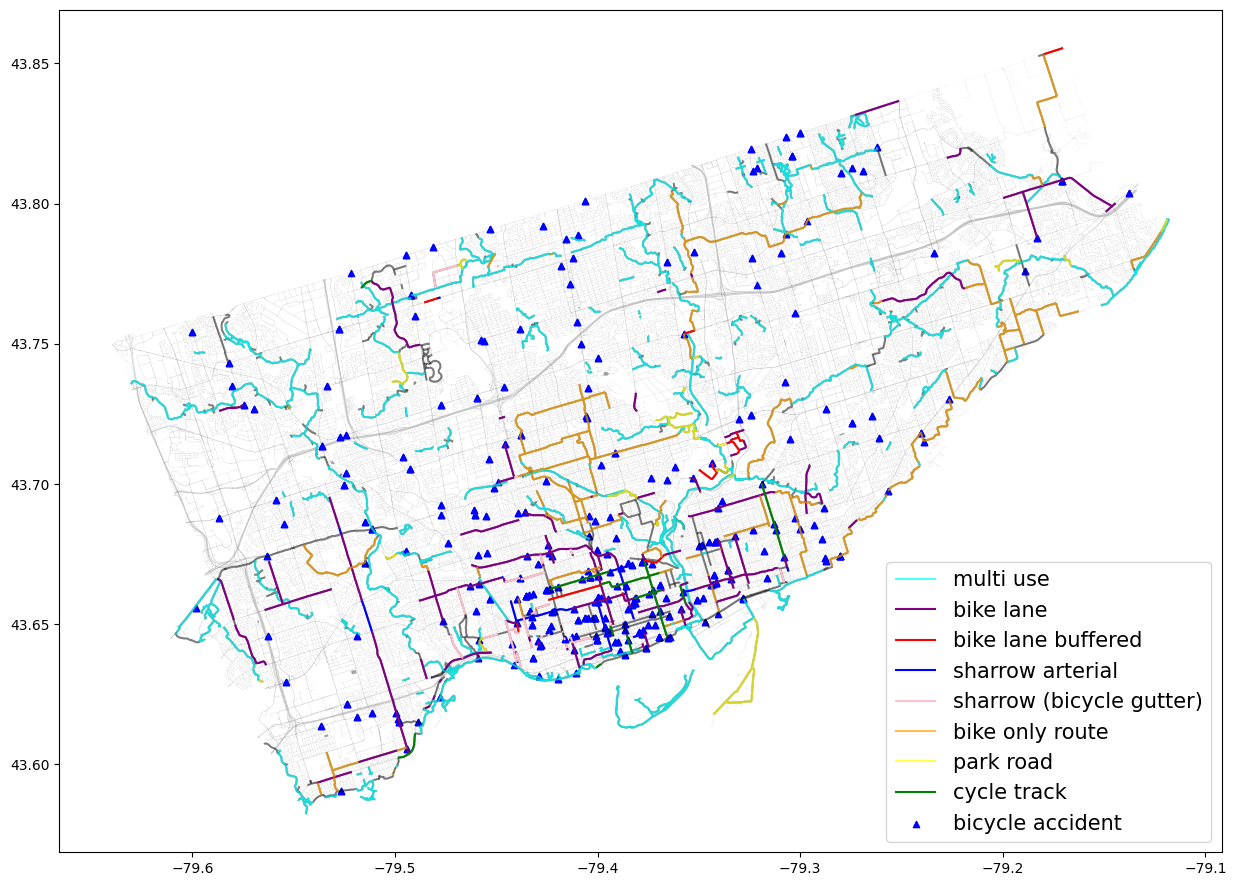

In [53]:
fig,ax = plt.subplots(figsize = (15,15))
trails.plot(ax =ax, alpha = 0.5, color = 'black')
street.plot(ax =ax, alpha = 0.5, color = 'grey')
# geo_df[geo_df['ACCLASS'] == 'Non-Fatal Injury'].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'non-fatal')
# geo_df[geo_df['ACCLASS'] == 'Fatal Injury'].plot(ax = ax, markersize = 20, color = 'red', marker = '^', label = 'fatal')
# streets.plot(ax = ax, alpha = 0.5, color = 'red')
multi_trial.plot(ax = ax, alpha = 0.7, color = 'cyan', label = 'multi use')
bike_lane.plot(ax = ax, alpha = 1, color = 'purple', label = 'bike lane')
bike_lane_buf.plot(ax = ax, alpha = 1, color = 'red', label = 'bike lane buffered')
Sharrows_arterial.plot(ax = ax, alpha = 1, color = 'blue', label = 'sharrow arterial')
Sharrows.plot(ax = ax, alpha = 1, color = 'pink', label = 'sharrow (bicycle gutter)')
route.plot(ax = ax, alpha = 0.7, color = 'orange', label = 'bike only route')
park_road.plot(ax = ax, alpha = 0.7, color = 'yellow', label = 'park road')
Cycle_Track.plot(ax = ax, alpha = 1, color = 'green', label = 'cycle track')

geo_df.plot(ax = ax, markersize = 20, color = 'blue', marker = '^',label = 'bicycle accident')
plt.legend(prop = {'size': 15})

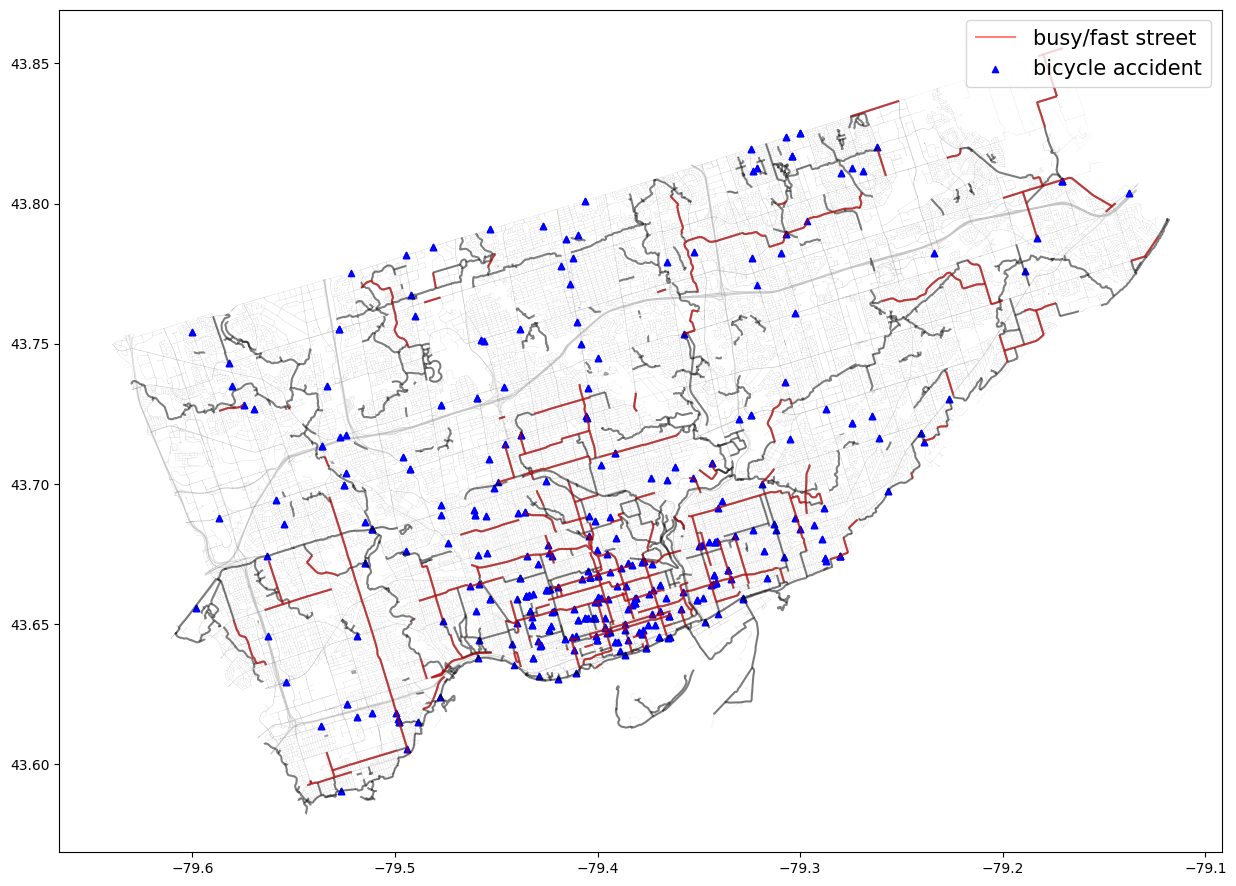

In [51]:
fig,ax = plt.subplots(figsize = (15,15))
trails.plot(ax =ax, alpha = 0.5, color = 'black')
street.plot(ax =ax, alpha = 0.5, color = 'grey')
# geo_df[geo_df['ACCLASS'] == 'Non-Fatal Injury'].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'non-fatal')
# geo_df[geo_df['ACCLASS'] == 'Fatal Injury'].plot(ax = ax, markersize = 20, color = 'red', marker = '^', label = 'fatal')
streets.plot(ax = ax, alpha = 0.5, color = 'red', label = 'busy/fast street ')


geo_df.plot(ax = ax, markersize = 20, color = 'blue', marker = '^',label = 'bicycle accident')
plt.legend(prop = {'size': 15})

Sharrow:

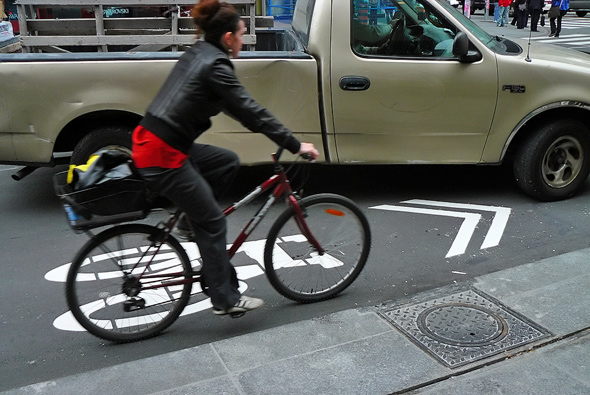


Most acidents in Toronto are occuring in busy or fast streets, in addition to that a majority of them occur on un-buffered bike lanes or sharrows, a possible solution could be converting these to cycle paths were there is a barrier between the cars and the cyclists. Since most of these accidents occur at intersections where the vehicle is going ahead a protected intersection or protected junction, also known as a Dutch-style junction, could be a safer option for cyclists.


The benefits of a protected intersection:

A corner refuge island


A setback crossing for pedestrians and cyclists, preferably 5 meters (16.5 ft) at signalized junctions

A forward stop bar, which allows cyclists to stop for a traffic light well ahead of motor traffic who must stop behind the crosswalk.

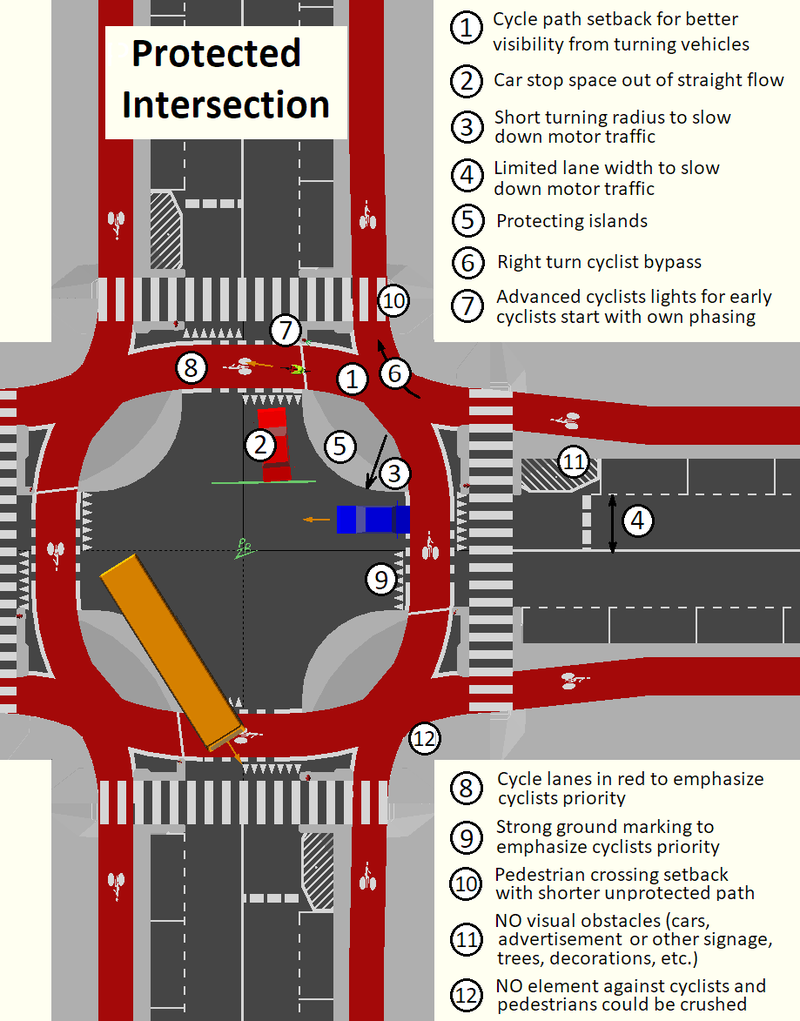

In [ ]:
#accidents pre 2016 (pre 2016 cycling infracture addition)
pre = df[df['YEAR'] < 2016]

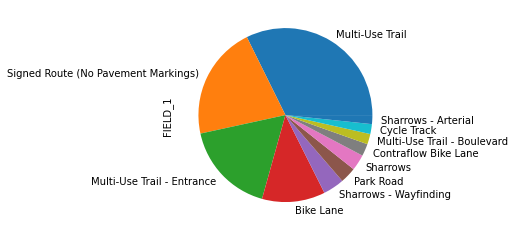

In [ ]:
comp = trails.groupby(by= 'FIELD_20')['FIELD_1'].nunique()
comp = comp.sort_values(ascending= False).head(11)
comp.plot.pie()